<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_2/A_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 788.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 67.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This

In [ ]:
from pycaret.datasets import get_data
data = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
#import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [ ]:
# import regressionExperiment and init the class
from pycaret.regression import *
exp = RegressionExperiment()

In [ ]:
#check type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
#init setup on exp
exp.setup(data, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [ ]:
#compare baseline models
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.7924,1579.2413,39.6573,0.9517,0.4229,0.4162,5.2800
xgboost,Extreme Gradient Boosting,25.7812,1731.7634,41.4958,0.9470,0.4384,0.4108,0.4300
et,Extra Trees Regressor,25.4045,1760.8952,41.8739,0.9461,0.3306,0.3031,4.2800
lightgbm,Light Gradient Boosting Machine,26.9083,1832.2569,42.7286,0.9439,0.4071,0.3991,0.8150
rf,Random Forest Regressor,27.4322,2054.7060,45.2461,0.9371,0.3500,0.3223,7.3410
dt,Decision Tree Regressor,35.4324,3514.0782,59.1033,0.8925,0.4381,0.3739,0.1800
gbr,Gradient Boosting Regressor,47.3275,4982.9980,70.4721,0.8476,0.6240,0.8473,1.7770
ada,AdaBoost Regressor,91.2784,12313.6629,110.9173,0.6221,1.0985,2.9021,0.9750
knn,K Neighbors Regressor,100.4764,19674.8599,140.2021,0.3972,1.1630,3.4291,0.1230
lr,Linear Regression,107.0915,20625.5317,143.5722,0.3680,1.2304,3.5175,0.9540


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.1610,1455.5500,38.1517,0.9536,0.4456,0.4588
1,24.4655,1433.8531,37.8663,0.9570,0.4069,0.3917
2,25.4837,1715.0265,41.4129,0.9487,0.4429,0.4357
3,25.2047,1677.3937,40.9560,0.9494,0.4193,0.3976
4,22.3298,1171.3683,34.2253,0.9604,0.4187,0.4158
5,24.6979,1701.0156,41.2434,0.9471,0.3987,0.3827
6,26.7658,1933.9862,43.9771,0.9425,0.4029,0.3696
7,23.6136,1435.0918,37.8826,0.9593,0.4514,0.4534
8,25.1110,1615.4747,40.1930,0.9492,0.4265,0.4257


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

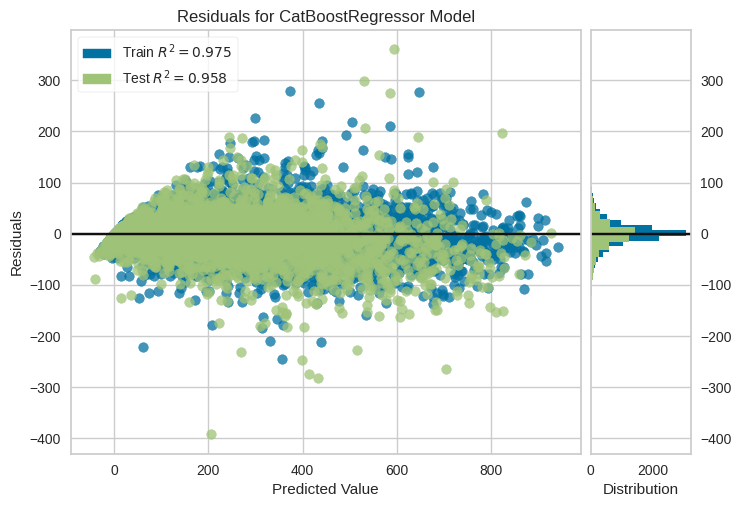

In [ ]:
#plot residuals
plot_model(best, plot = 'residuals')

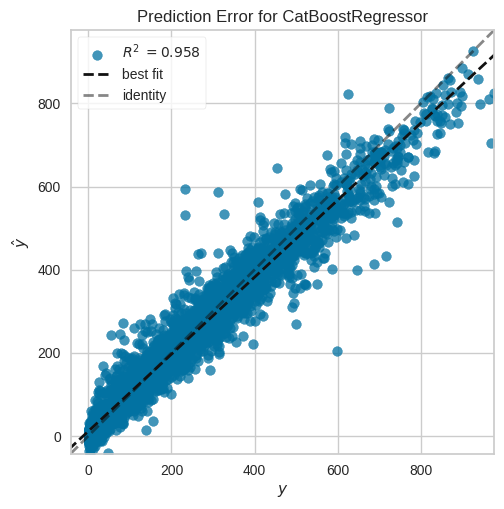

In [ ]:
#plot error
plot_model(best, plot = 'error')

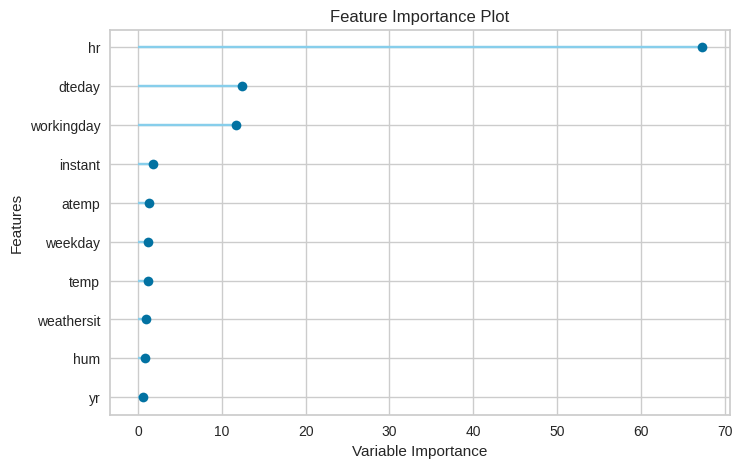

In [ ]:
#plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#predict on test set
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,23.9564,1405.1161,37.4849,0.9579,0.4162,0.3926


In [ ]:
#prediction df
pred.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,5793,9/3/2011,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,244.056511
7823,7824,11/27/2011,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,327.959320
15426,15427,10/9/2012,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,103.586526
15028,15029,9/23/2012,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,309.858011
12290,12291,6/1/2012,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,325.770831


In [ ]:
#copy data
new_data = data.copy()
new_data.drop('cnt', axis = 1, inplace = True)
new_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [ ]:
#predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,prediction_label
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,33.578494
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,22.664949
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,13.704616
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.181031
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.225079


In [ ]:
#save pipeline
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                              'hr', 'holiday', 'weekday',
                                              'workingday', 'weathersit', 'temp',
                                              'atemp', 'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegress

In [ ]:
#load pipline
loaded_best_pipeline = load_model('best_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                             'hr', 'holiday', 'weekday',
                                             'workingday', 'weathersit', 'temp',
                                             'atemp', 'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['dteday'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['dteday'],
                                    transformer=TargetEncoder(cols=['dteday'],
                                                              handle_missing='return_nan'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x79ca3be5d720>)])